In [1]:
# importing libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt


# loading data
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

# data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills'] =df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_us=df[df['job_country']=='United States']

In [3]:
df_skills=df_us.explode('job_skills')
df_skills[['job_title','job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


In [4]:
df_skills_count=df_skills.groupby(['job_skills','job_title_short']).size()

df_skills_count=df_skills_count.reset_index(name='skill_count')

df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)
df_skills_count


,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [5]:
job_titels=df_skills_count['job_title_short'].unique().tolist()
job_titels=sorted(job_titels[:3])
job_titels

['Data Analyst', 'Data Engineer', 'Data Scientist']

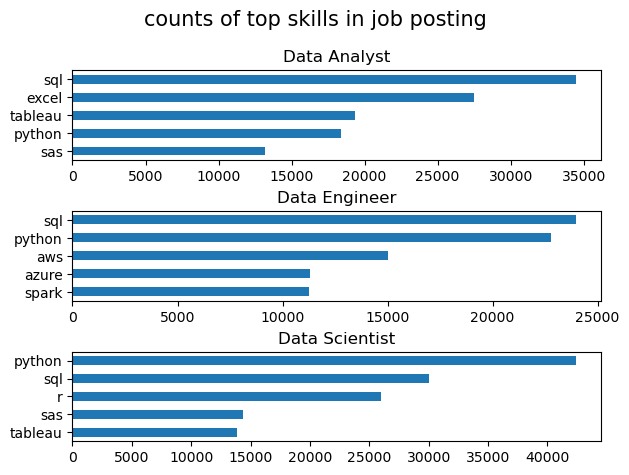

In [ ]:
fig, ax=plt.subplots(len(job_titels),1)
for i,job_titele in enumerate(job_titels):
    df_plot=df_skills_count[df_skills_count['job_title_short']==job_titele].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i],title=job_titele)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    
fig.suptitle('counts of top skills in job posting',fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

In [13]:
df_job_title_count=df_us['job_title_short'].value_counts().reset_index(name='job_total')
df_job_title_count

,job_title_short,job_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [19]:
df_skills_perc=pd.merge(df_skills_count,df_job_title_count,on='job_title_short',how='left')
df_skills_perc['skill_percent']=(df_skills_perc['skill_count']/df_skills_perc['job_total'])*100
df_skills_perc


,job_skills,job_title_short,skill_count,job_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


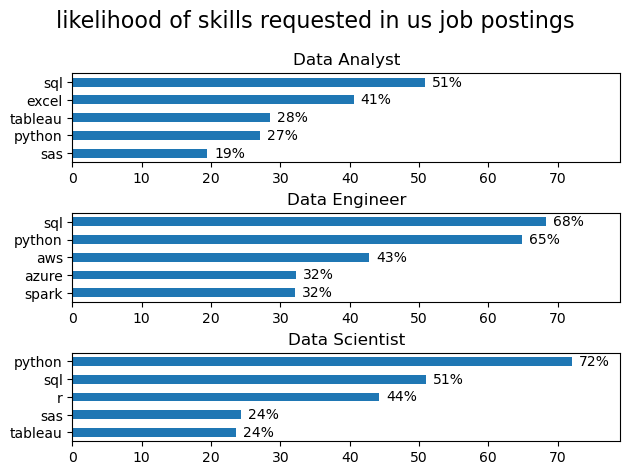

In [37]:
fig, ax=plt.subplots(len(job_titels),1)
for i,job_titele in enumerate(job_titels):
    df_plot=df_skills_perc[df_skills_perc['job_title_short']==job_titele].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='skill_percent',ax=ax[i],title=job_titele,   )
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,79)
    
    for n ,v in enumerate(df_plot['skill_percent']):
        ax[i].text(v+1,n,f'{v:.0f}%',va='center')
    
fig.suptitle('likelihood of skills requested in us job postings',fontsize=16)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()